## Kaggle: Heart Disease Indicators Dataset
Here's the link to the dataset: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

## Column Explanation

#### HighBP

Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional 
* `0` = No high blood pressure 
* `1` = High blood pressure

#### HighChol

If the patient has ever been told by a health professional that her/his blood cholesterol is high.

* `0` = False 
* `1` = True

#### CholCheck
Cholesterol check within past five years.

* `0` = False 
* `1` = True

#### BMI 

Body Mass Index. 

#### Heart Disease Or Art Attack
Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

* `0` = False 
* `1` = True

#### Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* `0` = False 
* `1` = True

#### Stroke
If patients have ever had a stroke.
* `0` = False 
* `1` = True

#### Diabetes
If patient has diabetes, if yes and patient is a female need to check if only during pregnancy.
* `0` = No diabetes or only during pregnance 
* `1` = pre-diabetes or borderline diabates
* `2` = yes diabates

#### PhysActivity
Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* `0` = No Physical activity 
* `1` = Physical activity

#### Fruits
Consume Fruit 1 or more times per day 
* `0` = No fruit consumed x day
* `1` = Fruit consumed x day 

#### Veggies 
Consume Vegetables 1 or more times per day
* `0` = No vegetables consumed x day
* `1` = Vegetables consumed x day 

#### HvyAlcoholConsump
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 

* `0` = False 
* `1` = True

#### AnyHealthcare
If the patient has any kind of health care coverage, including health insurance, prepaid plans such as HMOs or government plans such as Medicare, or Indian Health Service.
* `0` = False 
* `1` = True


#### NoDocbcCost

If there was a time in the past 12 months when patient needed to see a doctor but could not because of cost

* `0` = False 
* `1` = True

#### Genhlth
Adult with good or better health
* `1-5` = From Excellent to Poor.

#### Menthlth
For how many days during the past 30 days patient *mental health* wasn't good (mental health includes depression, stress, problems with emotions).

*  `1-30` = number of days
*  `0` = None

#### Physhlth
For how many days during the past 30 days patient *physical health* wasn't good (physical health includes physical illness and injury).

*  `1-30` = number of days
*  `0` = None

#### DiffWalk
Difficulties in walking or climbing stairs: 

* `0` = False 
* `1` = True

#### Gender
* `0` = Female
* `1` = Male

#### Age
`int 1`: Age 18 to 24 <br>
`int 2`: Age 25 to 29 <br>
`int 3`: Age 30 to 34 <br>
`int 4`: Age 35 to 39 <br>
`int 5`: Age 40 to 44 <br>
`int 6`: Age 45 to 49 <br>
`int 7`: Age 50 to 54 <br>
`int 8`: Age 55 to 59 <br>
`int 9`: Age 60 to 64 <br>
`int 10`: Age 65 to 69 <br>
`int 11`: Age 70 to 74 <br>
`int 12`: Age 75 to 79 <br>
`int 13`: Age 80 or older <br>

#### Education
What is the highest grade or year of school you completed?

`int 1`: Never attended school or only kindergarten <br>
`int 2`: Grades 1 through 8 (Elementary)  <br>
`int 3`: Grades 9 through 11 (Some high school) <br>
`int 4`: Grade 12 or GED (High school graduate) <br>
`int 5`: College 1 year to 3 years (Some college or technical school) <br>

#### Income
Is your annual household income from all sources: 
`int 1`: less than \\$10.000 <br>
`int 2`: less than \\$15.000 <br>
`int 3`: less than \\$20.000 <br>
`int 4`: less than \\$25.000 <br>
`int 5`: less than \\$35.000 <br>
`int 6`: less than \\$50.000 <br>
`int 7`: less than \\$75.000 <br>
`int 8`: $75.000 or more

In [1]:
#versioning
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.5.0
ipykernel        : 6.15.2
ipywidgets       : 8.0.2
jupyter_client   : 7.3.5
jupyter_core     : 4.11.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.6.8
nbconvert        : 7.0.0
nbformat         : 5.4.0
notebook         : 6.4.12
qtconsole        : 5.3.2
traitlets        : 5.3.0


In [2]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import xgboost
from xgboost import XGBClassifier
from xgboost import cv

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from collections import Counter
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import KMeansSMOTE


from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.model_selection import cross_val_score

import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [3]:
df = pd.read_csv('dataset/heart_disease.csv')

# Exploratory Data Analysis - EDA

### Dataset Description

In [4]:
df.shape

(253680, 22)

Size of the dataset is 253680 observations (rows) and 22 features (columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

* 22 Quantitative (numeric) features 
* Features data type: float64

In [6]:
df.describe().T

count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
Diabetes              253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
HeartDiseaseorAttack   1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
Diabetes               2.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

Summary statistics of the Dataframe

In [7]:
#changing the name of the column from 'Sex' to 'Gender'
df.rename(columns={'Sex':'Gender'}, inplace=True)

### Data Cleaning

In [8]:
# Check for null values
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Gender                  0
Age                     0
Education               0
Income                  0
dtype: int64

There's no presence of null value into this dataset. So we need not to handle them.

In [9]:
#Check for duplicated rows
df.duplicated().sum()

23899

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(229781, 22)

In [12]:
#very few data on borderline diabete value - pre diabete has a severe risk of diabete
Diabetes =df['Diabetes']
Diabetes.value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes, dtype: int64

In [13]:
df['Diabetes'].replace({2.0: 1.0},inplace = True) #borderline values considered as diabetes values

### Outliers

Is basically an observation that has low probability with respect a probability distribution model of the data. In our scenario, concerning health-care, an outlier may indicate a signification deviation from patient's standard behaviour, or can be error of measure.

<AxesSubplot:xlabel='BMI', ylabel='Density'>

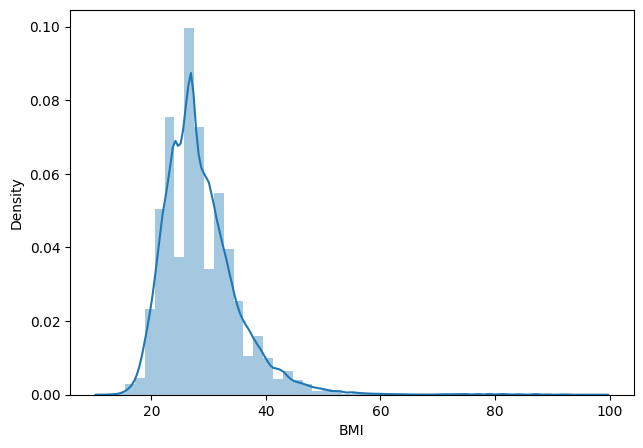

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['BMI'])

**skewed distribution** (peak to the left and then descend more slowly): I exclude removing outliers because this is a skewed distribution and also considering people with very high BMI value, removing those outlier in our case could lead to an important loss of information, namely that of excluding from the analysis people with a very high BMI value. 

#### Data Transformation

All columns, except for BMI, are int value so let's convert them from float to int.

In [15]:
df = df.astype({"HeartDiseaseorAttack":"int32","HighBP":"int32", "HighChol":"int32","CholCheck":"int32", "Smoker":"int32", 
               "Stroke":"int32","Diabetes":"int32", "PhysActivity":"int32","Fruits":"int32", "Veggies":"int32","HvyAlcoholConsump":"int32", 
               "AnyHealthcare":"int32","NoDocbcCost":"int32", "GenHlth":"int32","MentHlth":"int32", "PhysHlth":"int32","DiffWalk":"int32",
               "Gender":"int32", "Age": "int32", "Education": "int32", "Income": "int32"})

### Data Visualization

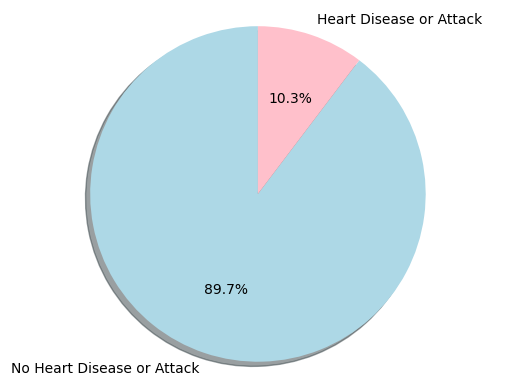

In [16]:
labels = "No Heart Disease or Attack", "Heart Disease or Attack"

fig1, ax1 = plt.subplots()
ax1.pie(df['HeartDiseaseorAttack'].value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["Lightblue", "Pink"] )
ax1.axis('equal')
plt.show()

The dataset is ubalanced, the distribution of the target variable `HeartDiseaseorAttack` is uneven. In fact, patients presenting a heart disease are only 10.3% of the dataset. Meaning that the result will be biased towards that particular class.

#### Variable correlation

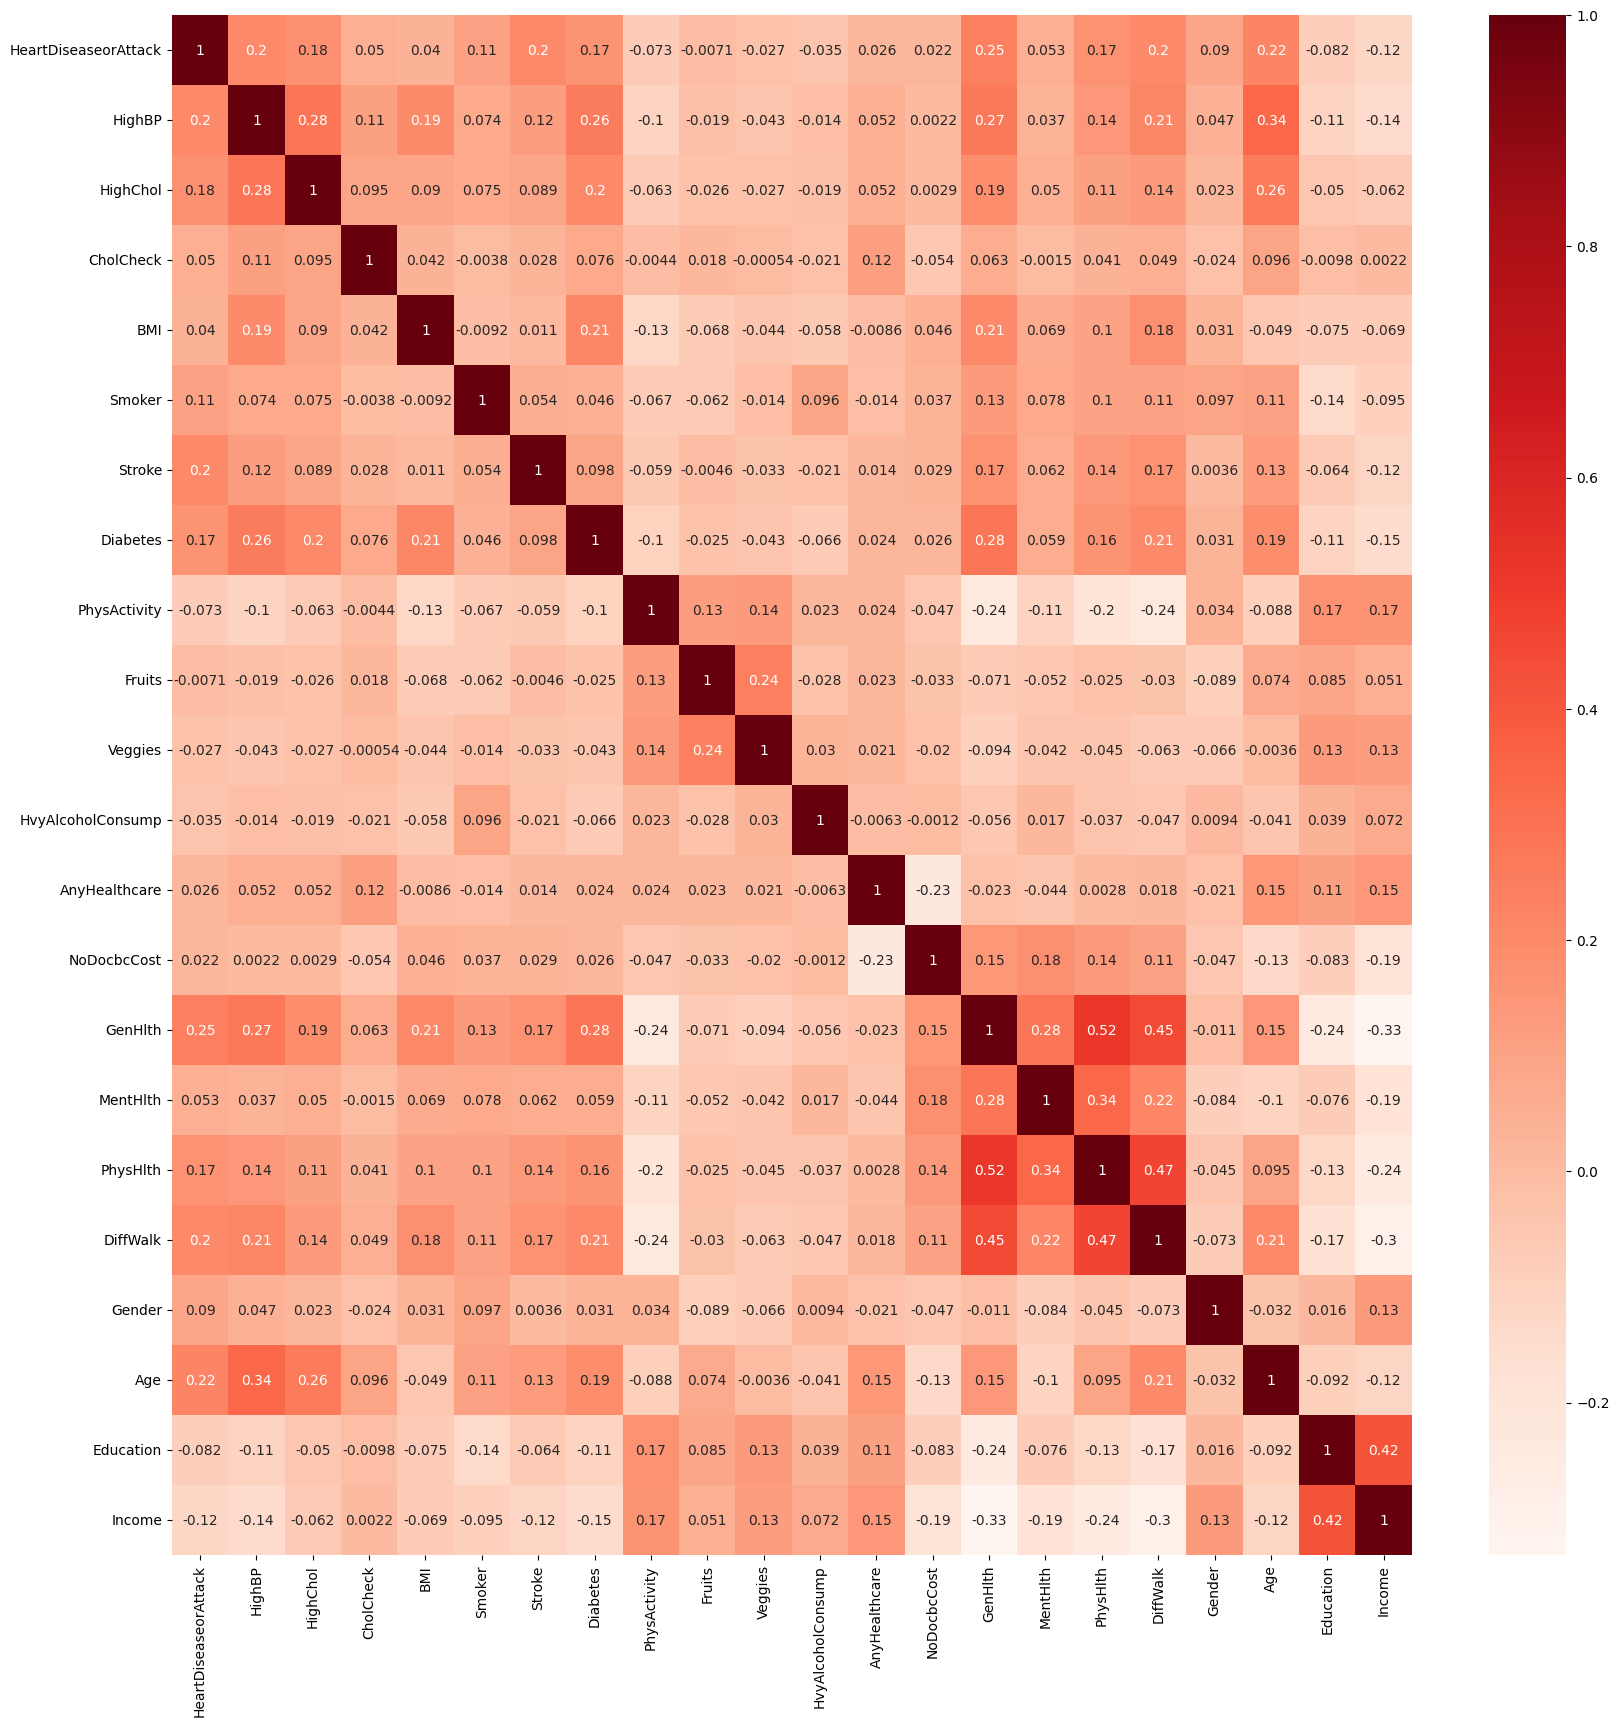

In [17]:
#variables correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

* Diabates: 
    * significantly positively correlated with:  HeartDiseaseorAttack, HighBP, HighChol, Stroke, Genetic Health, Physic Health, DiffWalk, Age
    * significantly negatively correlated with: Fruits, Income, Education
    
* Heart Disease Or Attack: 
    * significantly positively correlated with: Genetic Health, Physical Healt, High Cholesterol, Smoker Age, Difficulty in Walking, Diabetes, Stroke, High Blood Pressure.
    * significantly negatively correlated with: Income
 
* Income and Education are highly positively correlated between each other. Meaning that the higher the income, the higher is the level of education (or viceversa).
* Income 
    * positively correlated with: physical activity, gender, any health care
    * negatively correlated with: age, heart disease or attack, genetic health, pyshical health and difficulty in walking.
* Difficulties in walking or climbing stairs (DiffWalk) is highly positively correlated with Genetic Health and Pyhisc Health and Mental Health.
* Physical health: 
    * significantly positively correlated with: Genetic Health, mental Health, No Doctor because of the cost
    * significantly negatively correlated with: Physical Activity
* Mental Health
    * positively correlated with: Genetic Health 
    * significantly negatively correlated with: Age and Income
    
In general, there are no features that are particularly highly correlated between each other.

<Figure size 1200x500 with 0 Axes>

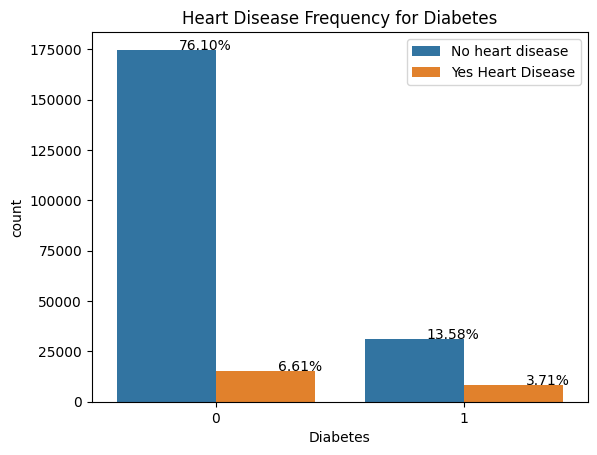

<Figure size 1200x500 with 0 Axes>

In [18]:
x= sns.countplot(x='Diabetes', hue='HeartDiseaseorAttack' , data = df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.legend(labels=['No heart disease', 'Yes Heart Disease'])
plt.title("Heart Disease Frequency for Diabetes");
plt.figure(figsize=(12,5))

In [19]:
data_crosstab = pd.crosstab(df['GenHlth'], df['HeartDiseaseorAttack'], margins = False)
print(data_crosstab)

HeartDiseaseorAttack      0     1
GenHlth                          
1                     33898  1009
2                     73499  4037
3                     65873  7841
4                     24822  6724
5                      7972  4106


With the lowest value of genetic health (4-5) a patiant is more likely to have heart disease or attack. 

In [20]:
data_crosstab = pd.crosstab(df['HvyAlcoholConsump'], df['HeartDiseaseorAttack'], margins = False)
print(data_crosstab)

HeartDiseaseorAttack       0      1
HvyAlcoholConsump                  
0                     192962  22869
1                      13102    848


11.8% of people with does not consume alchool heavily does have heart disease 
6.45% of peole which consume alchool heavily does have heart disease while

Alchool consumption seems to be not relevant. 

In [21]:
dc_alchool =  pd.crosstab(df['Stroke'], [df['HvyAlcoholConsump'],  df['Gender']])
print(dc_alchool)

HvyAlcoholConsump       0            1      
Gender                  0      1     0     1
Stroke                                      
0                  115775  90155  7396  6171
1                    5511   4390   172   211


In [22]:
dc_income =  pd.crosstab(df['Income'], [df['HvyAlcoholConsump'],  df['Gender']])
print(dc_income)

HvyAlcoholConsump      0            1      
Gender                 0      1     0     1
Income                                     
1                   6459   2967   179   187
2                   7714   3656   223   164
3                  10103   5198   341   280
4                  12224   6915   447   371
5                  14692   9477   613   563
6                  18561  14524   965   951
7                  19812  17791  1386  1200
8                  31721  34017  3414  2666


* (187 / 2967) * 100 = 6% - 6% of males with extremely low income (1) abuse of alcohol
* 2% of female with extremely low income (1) abuse of alcohol <br>
<br>
* 6% of males with medium income (5) abuse of alcohol
* 4% of female with medium income (5) abuse of alcohol <br>
<br>
* 7% of males with very high income (8) abuse of alcohol
* 10% of female with very high income (8) abuse of alcohol <br>
<br>
The numbers of women who abuse Alcohol go up when the salary level is higher, it is also to be considered however, that the top salary bracket has more data.

In [23]:
pd.set_option('display.max_rows', 100)
pd.crosstab(df.BMI, df.Diabetes)

Diabetes      0     1
BMI                  
12.0          6     0
13.0         18     3
14.0         36     5
15.0        120    12
16.0        326    22
17.0        704    57
18.0       1646    98
19.0       3436   173
20.0       5254   288
21.0       7837   554
22.0      10705   831
23.0      12245  1067
24.0      14851  1686
25.0      13134  1675
26.0      15542  2266
27.0      18411  3140
28.0      12422  2511
29.0      11261  2497
30.0      10869  2636
31.0       9281  2369
32.0       7612  2371
33.0       6370  2260
34.0       5125  1872
35.0       3895  1595
36.0       3192  1393
37.0       2878  1236
38.0       2265  1111
39.0       1930   966
40.0       1439   806
41.0       1083   571
42.0       1082   555
43.0        948   551
44.0        666   377
45.0        491   328
46.0        443   307
47.0        385   237
48.0        296   188
49.0        234   182
50.0        212   160
51.0        146   107
52.0        119    96
53.0        142    95
54.0         64    49
55.0         98    71
56.0         60    49
57.0         60    26
58.0         34    37
59.0         31    23
60.0         34    29
61.0         21    14
62.0         25    18
63.0         15    19
64.0         16     8
65.0          8    11
66.0          4     9
67.0          9     6
68.0          8     6
69.0          5     4
70.0         10     5
71.0         42     7
72.0          7     7
73.0         42     5
74.0         14     2
75.0         44     8
76.0          3     0
77.0         48     7
78.0          0     1
79.0         61     5
80.0          1     1
81.0         41     8
82.0         31     6
83.0          1     1
84.0         37     7
85.0          0     1
86.0          1     0
87.0         52     9
88.0          2     0
89.0         25     3
90.0          1     0
91.0          1     0
92.0         27     5
95.0         11     1
96.0          0     1
98.0          4     3

One point to consider is that a person's body mass index (BMI) is calculated by doing: $ kg/meter^2 $, so it is difficult to determine whether or not a person is overweight just by looking at the BMI. However, the BMI can still be considered as a determining factor because the higher it is, the more likely a person is overweight.


The higher the BMI value, the higher is the probability the patient suffer from Diabetes. For example, 58.1% of patient with a BMI of 43 suffers from Diabetes. Instead, with a BMI of 24 (normal weight), 11% of people suffers from diabetes. With cases of severe obesity (BMI 49), 77.7% of the sample of people have diabetes.

Belown it is shown the distribution plot of BMI and Diabetes:

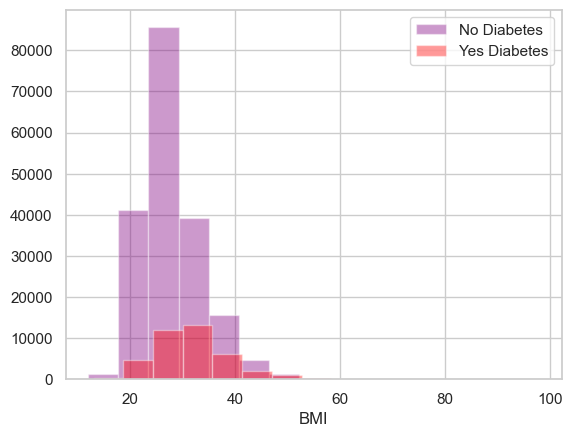

In [24]:
sns.set(style='whitegrid',)
sns.distplot(df[df['Diabetes']==0]['BMI'],bins=15,color='purple',kde=False)
sns.distplot(df[df['Diabetes']==1]['BMI'],bins=15,color='red',kde=False)
plt.legend(labels=['No Diabetes', 'Yes Diabetes'])

In [25]:
data_crosstab = pd.crosstab(df['HighBP'], df['Diabetes'], margins = False)
print(data_crosstab)

Diabetes       0      1
HighBP                 
0         114950  10409
1          75105  29317


Only 8.9% of people with standard blood pressure suffers from diabetes. Instead, 38% of people that suffers from high blood pressure suffers also from diabetes.

In [26]:
data_crosstab = pd.crosstab(df['GenHlth'], df['Diabetes'], margins = False)
print(data_crosstab)

Diabetes      0      1
GenHlth               
1         33459   1448
2         70044   7492
3         58662  15052
4         20740  10806
5          7150   4928


People with poor genetic health are most likely to suffer from Diabetes. 70% of people with the lowest score of genetic health (5) suffers from Diabetes. 50% of people with a low score genetic health (4) suffers from diabetes. 
Percentage of people suffering from diabetes decreases as the score of genetic health gets higher.

# Build the model

In [27]:
X = df.drop('HeartDiseaseorAttack',1) 
y = df['HeartDiseaseorAttack']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)

# Report

In [29]:
import pandas_profiling

In [30]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Models

In [31]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import EditedNearestNeighbours 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [32]:
#OVERSAMPLING
#over = RandomOverSampler(sampling_strategy='minority', random_state=42)
#over_adasyn = ADASYN(random_state=42)

over_smote=SMOTE(random_state=42, sampling_strategy='minority')
###############################################
#UNDERSAMPLING 
#under_random = RandomUnderSampler(sampling_strategy='majority', random_state=42) 
#nearmiss = NearMiss(version=3)

########################################################
#combination of techniques SMOTE + RANDOM UNDERSAMPLING: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#steps = [('o', over), ('u', under_random)]
#steps = [('o', over_smote), ('u', under_random)]

#pipeline = Pipeline(steps=steps) #pipeline.fit: pipeline.fit_resample(X_train, y_train)

#SMOOTEHN - Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

#sme = SMOTEENN(random_state=42)

#smote_tomek = SMOTETomek(random_state=42) #sampling strategy resample all 

#smoteTomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42) 
#smooten_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'), random_state=42) #resample only the majority class #best since now


In [33]:
#fit and apply the transform
X_train, y_train = over_smote.fit_resample(X_train, y_train)


In [34]:
X_train.shape

(288434, 21)

In [35]:
#SCALING WITH KNN 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
X_train_res =scaler.fit_transform(X_train)
X_test_res=scaler.transform(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
import time

accuracy_knn = []

k_neighbour = range(1,12) 
for i in k_neighbour:
    knn = KNeighborsClassifier(n_neighbors=i)
    start = time.time()
    knn.fit(X_train_res, y_train)
    stop = time.time()
    
    y_test_pred = knn.predict(X_test_res)
   
    accuracy_knn.append(accuracy_score(y_test, y_test_pred))

print(f"Training time: {stop - start}s")

Training time: 0.02530193328857422s


Text(0, 0.5, 'accuracy score')

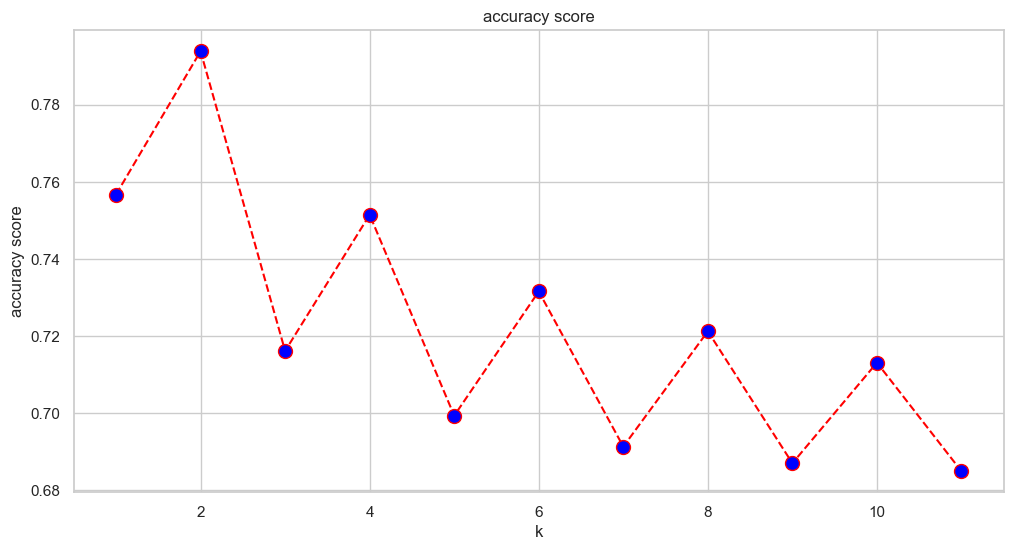

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(k_neighbour, accuracy_knn, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('accuracy score')
plt.xlabel('k')
plt.ylabel('accuracy score')

In [39]:
best_k = accuracy_knn.index(max(accuracy_knn))
print(best_k)

1


In [40]:
knn = KNeighborsClassifier(n_neighbors=best_k+1)

start = time.time()
knn.fit(X_train_res, y_train)
stop = time.time()
    
y_pred_knn = knn.predict(X_test_res)
score = knn.score(X_test_res, y_test)
   
accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

In [41]:
matrix = classification_report(y_test,y_pred_knn)
print(matrix)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     61847
           1       0.19      0.31      0.24      7088

    accuracy                           0.79     68935
   macro avg       0.55      0.58      0.56     68935
weighted avg       0.84      0.79      0.81     68935



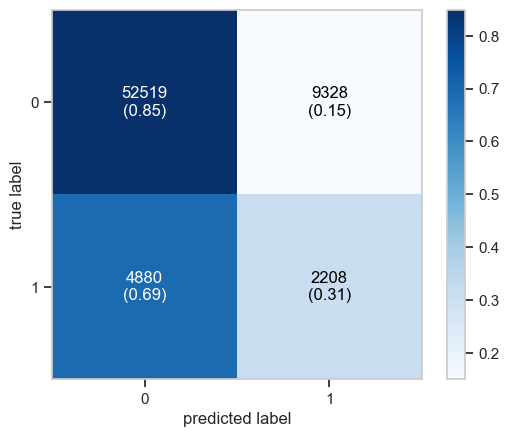

In [42]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred_knn)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train,y_train)

ytest_model = model.predict(X_test)
ytrain_model = model.predict(X_train)
fitted_max_depth = model.tree_.max_depth
print("The accuracy on test set is:", accuracy_score(y_test, ytest_model) * 100, "%")
#print("The accuracy on train set is:", accuracy_score(y_train, ytrain_model) * 100, "%")
print("The maximum depth of the tree fitted on X_train:", fitted_max_depth)

depth_range = range(1,fitted_max_depth+1)

The accuracy on test set is: 77.1117719590919 %
The maximum depth of the tree fitted on X_train: 44


In [44]:
mean_accuracy_dt = []
for i in depth_range:
    dt = tree.DecisionTreeClassifier(max_depth=i, random_state=42, criterion="entropy")
    scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv = 5)
    mean_accuracy_dt.append(np.mean(scores))

Text(0, 0.5, 'Accuracy varying the max depth of the tree')

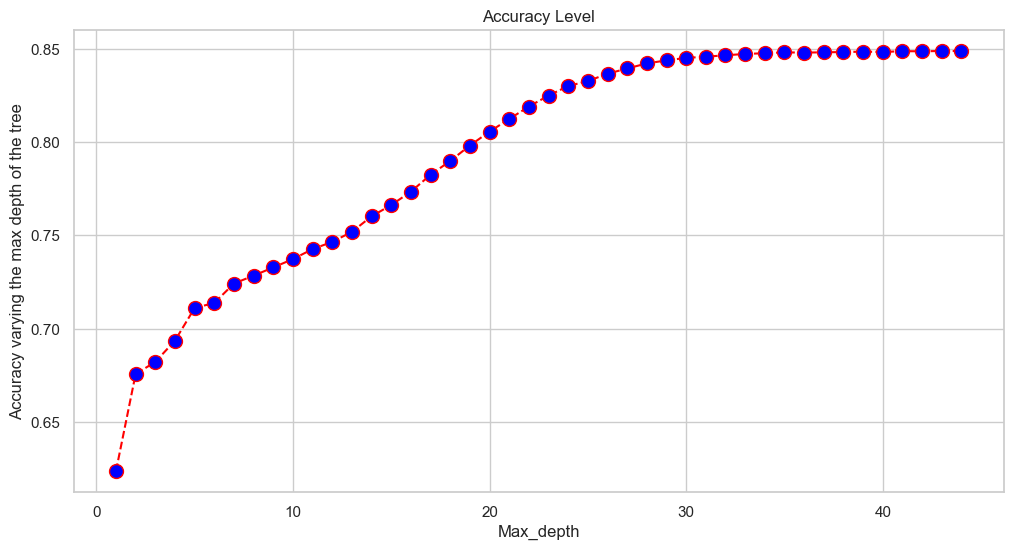

In [45]:
import matplotlib.pyplot as plt
x
plt.figure(figsize=(12, 6))
plt.plot(depth_range, mean_accuracy_dt, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Accuracy Level')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy varying the max depth of the tree')

It becomes flat so it does not improve anymore.

In [46]:
best_cross_val_score = depth_range[np.argmax(mean_accuracy_dt)]
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth = best_cross_val_score)
dt.fit(X_train,y_train);
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt) * 100
print("The accuracy on test set tuned with cross_validation is {:.1f}% with depth {}".format(accuracy, best_cross_val_score))

The accuracy on test set tuned with cross_validation is 77.1% with depth 43


In [47]:
matrix = classification_report(y_test,y_pred_dt)
print(matrix)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     61847
           1       0.18      0.36      0.24      7088

    accuracy                           0.77     68935
   macro avg       0.55      0.59      0.55     68935
weighted avg       0.84      0.77      0.80     68935



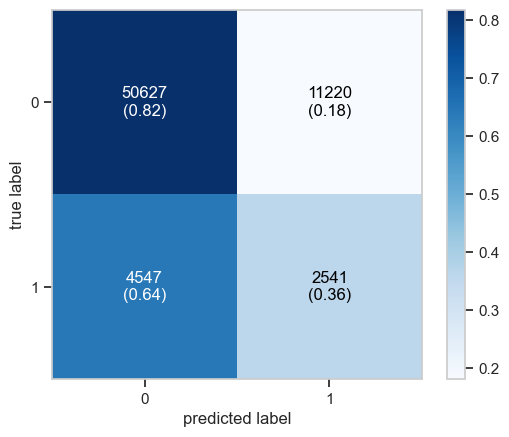

In [48]:
cm1 = confusion_matrix(y_test,y_pred_dt)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

## Random Forest

In [49]:
predictions_randomForest = []
accuracy_rf = []
f1_rf = []
depth_range_rf = list(range(1, 12)) #with smote (1,15) range -> less depth increases the number of TP and decreases the one of TN

mean_accuracy_rf = []
for i in depth_range_rf:
    rf = RandomForestClassifier(max_depth=i, random_state=0, criterion='entropy')
    scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv = 5)
    mean_accuracy_rf.append(np.mean(scores))

Text(0, 0.5, 'Accuracy varying the max depth of the tree')

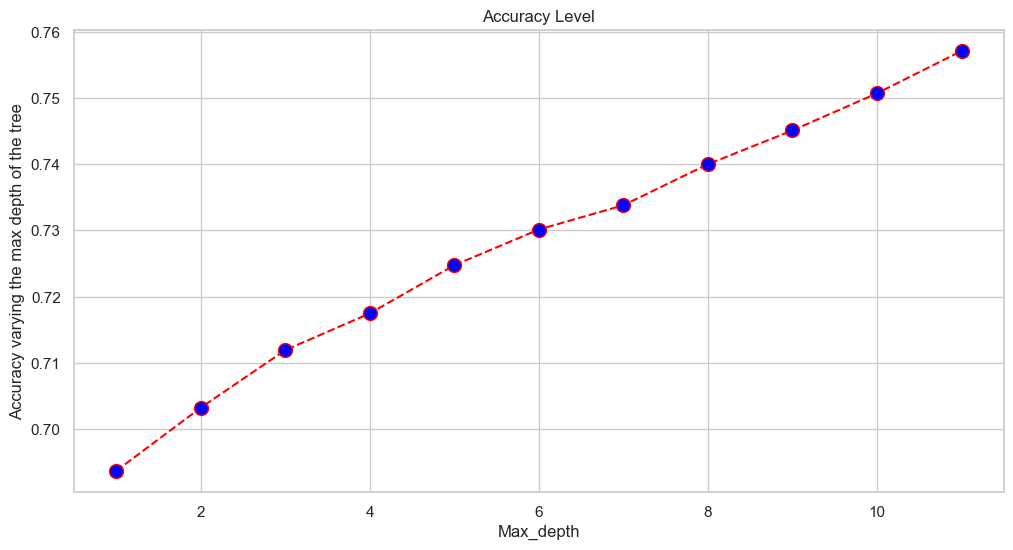

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(depth_range_rf, mean_accuracy_rf, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Accuracy Level')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy varying the max depth of the tree')

In [51]:
best_cross_val_score_rf = depth_range_rf[np.argmax(mean_accuracy_rf)]
rf = RandomForestClassifier(max_depth = best_cross_val_score_rf, criterion="entropy")
rf.fit(X_train,y_train);
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print("The accuracy on test set tuned with cross_validation is {:.1f}% with depth {}".format(accuracy, best_cross_val_score_rf))

The accuracy on test set tuned with cross_validation is 70.1% with depth 11


In [52]:
matrix = classification_report(y_test,y_pred_rf)
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     61847
           1       0.22      0.74      0.34      7088

    accuracy                           0.70     68935
   macro avg       0.59      0.72      0.57     68935
weighted avg       0.88      0.70      0.76     68935



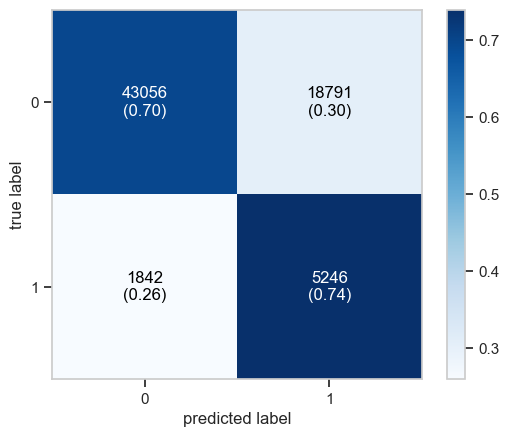

In [53]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

## XGBC

In [54]:
xg = XGBClassifier(learning_rate=0.01, max_depth=10) #with a lower learning rate, it is more precise in predicting patients with heart disease
start = time.time()
xg.fit(X_train, y_train)
scores = cross_val_score(xg, X_train, y_train, cv=5, scoring='accuracy')
elapsed = time.time() - start

print("XGBClassifier Accuracy: ", np.mean(scores))
print("XGBoost time: %f" % (elapsed))

XGBClassifier Accuracy:  0.7559996528590938
XGBoost time: 132.892854


In [55]:
y_pred_xgbc = xg.predict(X_test)

In [56]:
matrix = classification_report(y_test,y_pred_xgbc)
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     61847
           1       0.21      0.73      0.33      7088

    accuracy                           0.70     68935
   macro avg       0.59      0.71      0.57     68935
weighted avg       0.88      0.70      0.75     68935



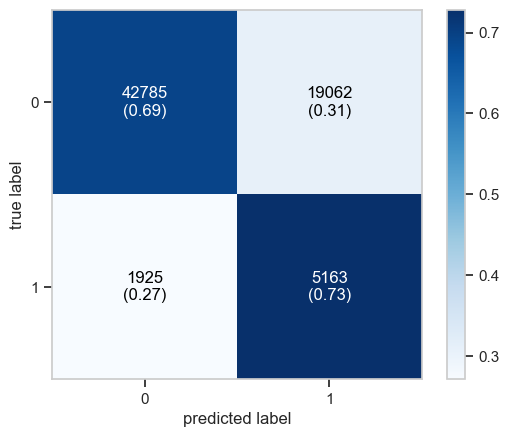

In [57]:
cm1 = confusion_matrix(y_test,y_pred_xgbc)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()